In [21]:
import pickle
import pandas
import matplotlib.pyplot as plt

pandas.set_option('display.max_columns', None)

In [4]:
with open('../transformed_event_logs/PCR_start_end_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

In [5]:
train_data

,case:concept:name,id:id_start,cpee:activity_start,cpee:instance_start,lifecycle:transition_start,cpee:lifecycle:transition_start,cpee:state_start,time:timestamp_start,data_start,cpee:description_start,...,seconds_in_day,day_of_week,Callback timeout,Export result,Export to EMS,Match patient data,Receive sample state,Send notification,Wait for plate validation,timeout
30928,10056,a2,a2,7bbdad33-b3e0-4e77-92a1-07d6f1429544,start,activity/calling,0.0,2023-04-03 12:02:52.198,"{'value': None, 'children': [('', {'value': ''...",0.0,...,43372,0,0,0,0,0,0,0,0,1
10998,10056,a6,a6,7bbdad33-b3e0-4e77-92a1-07d6f1429544,start,activity/calling,0.0,2023-04-03 12:02:52.201,"{'value': None, 'children': [('', {'value': ''...",0.0,...,43372,0,0,0,0,0,0,0,1,1
7606,10056,a4,a4,7bbdad33-b3e0-4e77-92a1-07d6f1429544,start,activity/calling,0.0,2023-04-03 12:02:52.207,"{'value': None, 'children': [('', {'value': ''...",0.0,...,43372,0,0,0,0,1,0,0,1,1
20701,10057,a2,a2,1887c54f-6403-420d-87ee-3cbc9ac6888a,start,activity/calling,0.0,2023-04-03 12:03:01.365,"{'value': None, 'children': [('', {'value': ''...",0.0,...,43381,0,0,0,0,0,0,0,0,1
1968,10057,a6,a6,1887c54f-6403-420d-87ee-3cbc9ac6888a,start,activity/calling,0.0,2023-04-03 12:03:01.369,"{'value': None, 'children': [('', {'value': ''...",0.0,...,43381,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,18121,a5,a5,e8075204-b208-4666-b262-91a222abd9b2,start,activity/calling,0.0,2023-06-12 21:08:04.345,"{'value': None, 'children': [('', {'value': ''...",0.0,...,76084,0,1,1,1,1,1,0,1,1
9978,18101,a5,a5,052a29f7-aa7a-4d86-a164-fc0f182f1cd7,start,activity/calling,0.0,2023-06-12 21:08:04.347,"{'value': None, 'children': [('', {'value': ''...",0.0,...,76084,0,1,1,1,1,1,0,1,1
11937,18108,a5,a5,0eae8ae9-f8cf-40fc-a5e3-eb78031df68a,start,activity/calling,0.0,2023-06-12 21:08:04.369,"{'value': None, 'children': [('', {'value': ''...",0.0,...,76084,0,1,1,1,1,1,0,1,1
31352,18109,a5,a5,c4c85eaa-560a-4a4e-8df0-38e3fa8a625c,start,activity/calling,0.0,2023-06-12 21:08:04.370,"{'value': None, 'children': [('', {'value': ''...",0.0,...,76084,0,1,1,1,1,1,0,1,1


In [9]:
train_data['duration_seconds'].describe()

count     25955.000000
mean       6176.301545
std       14825.945355
min           0.031000
25%           3.233500
50%          24.627000
75%        9621.810500
max      318065.828000
Name: duration_seconds, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde654b9430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde654b9910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde654b8b00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde654b9f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde654ba270>],
 'means': []}

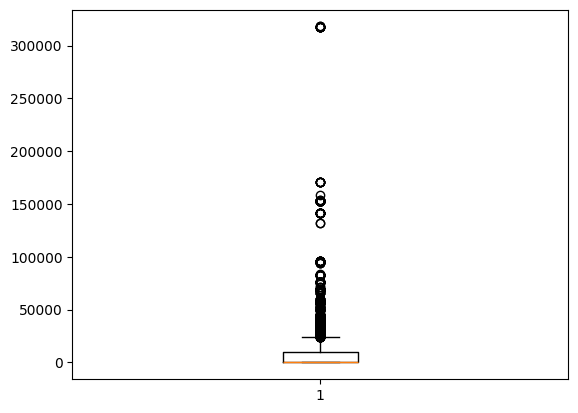

In [8]:
plt.boxplot(train_data['duration_seconds'])

In [11]:
over_10k = train_data[train_data['duration_seconds'] > 10000]

In [18]:
over_10k.groupby(['concept:name']).count()

,case:concept:name,id:id_start,cpee:activity_start,cpee:instance_start,lifecycle:transition_start,cpee:lifecycle:transition_start,cpee:state_start,time:timestamp_start,data_start,cpee:description_start,...,seconds_in_day,day_of_week,Callback timeout,Export result,Export to EMS,Match patient data,Receive sample state,Send notification,Wait for plate validation,timeout
concept:name,,,,,,,,,,,,,,,,,,,,,
Export result,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
Export to EMS,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
Match patient data,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Wait for plate validation,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283,...,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283
timeout,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783,...,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783


In [22]:
over_10k[over_10k['concept:name'] == 'Match patient data']

,case:concept:name,id:id_start,cpee:activity_start,cpee:instance_start,lifecycle:transition_start,cpee:lifecycle:transition_start,cpee:state_start,time:timestamp_start,data_start,cpee:description_start,concept:name,concept:endpoint_start,cpee:activity_uuid_start,raw_start,start_timestamp_start,id:id_complete,cpee:activity_complete,cpee:instance_complete,lifecycle:transition_complete,cpee:lifecycle:transition_complete,cpee:state_complete,time:timestamp_complete,data_complete,cpee:description_complete,concept:endpoint_complete,cpee:activity_uuid_complete,raw_complete,start_timestamp_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Callback timeout,Export result,Export to EMS,Match patient data,Receive sample state,Send notification,Wait for plate validation,timeout
14612,10095,a4,a4,132ec07c-e06b-4fb7-a36f-b2c4be2a4c4a,start,activity/calling,0.0,2023-04-03 12:11:54.970,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://greschner.azurewebsites.net/backend/corr,73419e74acec9558e6e7eee84249d843,0,2023-04-03 12:11:54.970000,a4,a4,132ec07c-e06b-4fb7-a36f-b2c4be2a4c4a,complete,activity/done,0.0,2023-04-03 18:08:07.654,0,0.0,https://greschner.azurewebsites.net/backend/corr,a0da12b92b197b04e86f1ec10739dbe7,0,2023-04-03 18:08:07.654000,0 days 05:56:12.684000,21372.684,21372684.0,5.936857,43914,0,0,0,0,1,0,0,0,0
23396,10512,a4,a4,91a9e9e4-4b1f-4e71-864d-be10b9f79f3e,start,activity/calling,0.0,2023-04-04 06:46:53.583,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://greschner.azurewebsites.net/backend/corr,b9a1219988baf704b931797324871606,0,2023-04-04 06:46:53.583000,a4,a4,91a9e9e4-4b1f-4e71-864d-be10b9f79f3e,complete,activity/done,0.0,2023-04-04 20:05:28.111,0,0.0,https://greschner.azurewebsites.net/backend/corr,ea6a9ffca64c9bd3e7bd328552433a0a,0,2023-04-04 20:05:28.111000,0 days 13:18:34.528000,47914.528,47914528.0,13.309591,24413,1,0,0,0,1,0,0,0,1
32152,10642,a4,a4,12eb9ce3-8f2d-4f43-b0ff-ef06ebb4585e,start,activity/calling,0.0,2023-04-04 21:09:01.656,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://greschner.azurewebsites.net/backend/corr,fe445e43a2b0dfe98ebe760327d9351a,0,2023-04-04 21:09:01.656000,a4,a4,12eb9ce3-8f2d-4f43-b0ff-ef06ebb4585e,complete,activity/done,0.0,2023-04-05 07:13:13.743,0,0.0,https://greschner.azurewebsites.net/backend/corr,79dc0bcf8efe781ca92df1fd2f9ca2aa,0,2023-04-05 07:13:13.743000,0 days 10:04:12.087000,36252.087,36252087.0,10.070024,76141,1,0,0,0,1,0,0,0,0
27604,10912,a4,a4,075603a3-3061-4eb5-830d-5aead111ad11,start,activity/calling,0.0,2023-04-05 21:07:23.866,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://greschner.azurewebsites.net/backend/corr,da8f8fcec50c9d765c4076c47563dfc7,0,2023-04-05 21:07:23.866000,a4,a4,075603a3-3061-4eb5-830d-5aead111ad11,complete,activity/done,0.0,2023-04-06 04:21:54.975,0,0.0,https://greschner.azurewebsites.net/backend/corr,da8f8fcec50c9d765c4076c47563dfc7,0,2023-04-06 04:21:54.975000,0 days 07:14:31.109000,26071.109,26071109.0,7.241975,76043,2,0,0,0,1,0,0,1,1
9820,12883,a4,a4,9016b61a-b474-4907-9fd0-07643ed74ce9,start,activity/calling,0.0,2023-04-16 16:40:49.879,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://mygreschner.com//backend/corr,4ce6a1e70d7e23ca41f4109baca765cb,0,2023-04-16 16:40:49.879000,a4,a4,9016b61a-b474-4907-9fd0-07643ed74ce9,complete,activity/done,0.0,2023-04-16 20:10:15.195,0,0.0,https://mygreschner.com//backend/corr,4ce6a1e70d7e23ca41f4109baca765cb,0,2023-04-16 20:10:15.195000,0 days 03:29:25.316000,12565.316,12565316.0,3.490366,60049,6,0,0,0,1,0,0,1,1
22998,13027,a4,a4,96f44279-55bc-4fa8-937b-23dd3e4071dc,start,activity/calling,0.0,2023-04-17 17:06:28.692,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://mygreschner.com//backend/corr,b6b7f0a97e8cc7e12d058ed20d4f8a2a,0,2023-04-17 17:06:28.692000,a4,a4,96f44279-55bc-4fa8-9

In [24]:
train_data[train_data['concept:name'] == 'Match patient data']['duration_seconds'].describe()

count      4809.000000
mean        189.680591
std        3444.202450
min           0.031000
25%           4.526000
50%           6.378000
75%           9.397000
max      158301.015000
Name: duration_seconds, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde5d8931a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde5d893a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde5d88f950>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde5d893d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde5d898140>],
 'means': []}

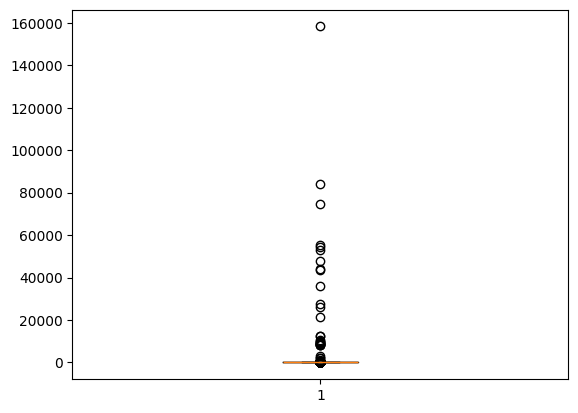

In [23]:
plt.boxplot(train_data[train_data['concept:name'] == 'Match patient data']['duration_seconds'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde5d8a4890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde5d8a4ec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde5d8a45f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde5d8a5370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde5d8a5640>],
 'means': []}

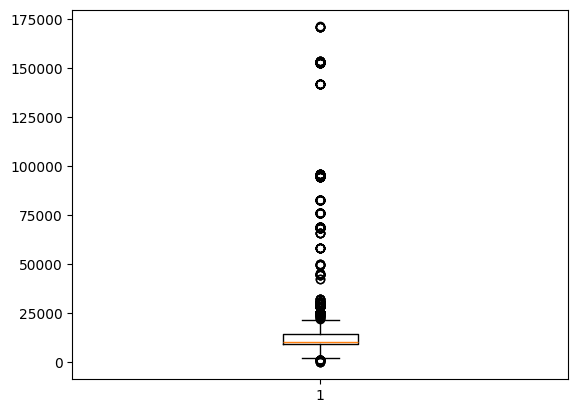

In [32]:
plt.boxplot(train_data[train_data['concept:name'] == 'timeout']['duration_seconds'])

In [33]:
train_data[train_data['concept:name'] == 'timeout']['duration_seconds'].describe()

count      4597.000000
mean      18397.529024
std       24225.036227
min           0.034000
25%        9462.135000
50%       10487.744000
75%       14358.536000
max      171131.372000
Name: duration_seconds, dtype: float64

In [34]:
train_data[(train_data['case:concept:name'] == 12326) ]

,case:concept:name,id:id_start,cpee:activity_start,cpee:instance_start,lifecycle:transition_start,cpee:lifecycle:transition_start,cpee:state_start,time:timestamp_start,data_start,cpee:description_start,concept:name,concept:endpoint_start,cpee:activity_uuid_start,raw_start,start_timestamp_start,id:id_complete,cpee:activity_complete,cpee:instance_complete,lifecycle:transition_complete,cpee:lifecycle:transition_complete,cpee:state_complete,time:timestamp_complete,data_complete,cpee:description_complete,concept:endpoint_complete,cpee:activity_uuid_complete,raw_complete,start_timestamp_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Callback timeout,Export result,Export to EMS,Match patient data,Receive sample state,Send notification,Wait for plate validation,timeout
16239,12326,a4,a4,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,start,activity/calling,0.0,2023-04-12 17:48:49.110,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://mygreschner.com//backend/corr,80080c42e7da7273cc6fa1c847183b30,0,2023-04-12 17:48:49.110000,a4,a4,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,complete,activity/done,0.0,2023-04-12 17:49:02.741,0,0.0,https://mygreschner.com//backend/corr,80080c42e7da7273cc6fa1c847183b30,0,2023-04-12 17:49:02.741000,0 days 00:00:13.631000,13.631,13631.0,0.003786,64129,2,0,0,0,1,0,0,0,0
10197,12326,a2,a2,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,start,activity/calling,0.0,2023-04-12 17:48:49.117,"{'value': None, 'children': [('', {'value': ''...",0.0,timeout,https://mygreschner.com/backend/services/timeout2,4ffff45872a724b9ffd21397bea30c3d,0,2023-04-12 17:48:49.117000,a2,a2,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,complete,activity/done,0.0,2023-04-14 12:17:41.930,0,0.0,https://mygreschner.com/backend/services/timeout2,4ffff45872a724b9ffd21397bea30c3d,0,2023-04-14 12:17:41.930000,1 days 18:28:52.813000,152932.813,152932813.0,42.481337,64129,2,0,0,0,1,0,0,0,1
4045,12326,a6,a6,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,start,activity/calling,0.0,2023-04-12 17:48:49.125,"{'value': None, 'children': [('', {'value': ''...",0.0,Wait for plate validation,https-get://cpee.org/ing/correlators/message/r...,1f6fc18e3f62adb5f98045126126d025,0,2023-04-12 17:48:49.125000,a6,a6,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,complete,activity/done,0.0,2023-04-12 20:29:40.420,0,0.0,https-get://cpee.org/ing/correlators/message/r...,1f6fc18e3f62adb5f98045126126d025,0,2023-04-12 20:29:40.420000,0 days 02:40:51.295000,9651.295,9651295.0,2.680915,64129,2,0,0,0,1,0,0,1,1
10535,12326,a1,a1,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,start,activity/calling,0.0,2023-04-12 20:29:40.451,"{'value': None, 'children': [('', {'value': ''...",0.0,Receive sample state,https://mygreschner.com//backend/corr,52dee04c2ebd05f25e58d3b590fbdaa1,0,2023-04-12 20:29:40.451000,a1,a1,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,complete,activity/done,0.0,2023-04-12 20:29:45.432,0,0.0,https://mygreschner.com//backend/corr,52dee04c2ebd05f25e58d3b590fbdaa1,0,2023-04-12 20:29:45.432000,0 days 00:00:04.981000,4.981,4981.0,0.001384,73780,2,0,0,0,1,1,0,1,1
25321,12326,a5,a5,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,start,activity/calling,0.0,2023-04-12 20:29:45.444,"{'value': None, 'children': [('', {'value': ''...",0.0,Callback timeout,https://mygreschner.com/backend/services/timeout2,c8593ce2d1c41e3cc0b282635a5509a2,0,2023-04-12 20:29:45.444000,a5,a5,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,complete,activity/done,0.0,2023-04-12 20:29:46.354,0,0.0,https://mygreschner.com/backend/services/timeout2,c8593ce2d1c41e3cc0b282635a5509a2,0,2023-04-12 20:29:46.354000,0 days 00:00:00.910000,0.910,910.0,0.000253,73785,2,1,0,0,1,1,0,1,1
24579,12326,a3,a3,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,start,activity/calling,0.0,2023-04-14 12:17:42.028,"{'value': None, 'children': [('', {'value': ''...",0.0,Send notification,https://mygreschner.com/backend/services/notif...,c2bcccec33337fca966cdc86935927e8,0,2023-04-14 12:17:42.028000,a3,a3,c325ad3e-c804-4673-8f94-4ee3ea0fd6b7,complete,activit

In [30]:
train_data[(train_data['case:concept:name'] == 15337) & (train_data['concept:name'] == 'timeout')]['data_start'].iloc[0]

"{'value': None, 'children': [('', {'value': '', 'children': {'name': 'duration', 'value': '25200'}})]}"